In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
swiggy_50= pd.read_csv('Swiggy_50.csv')

In [8]:
swiggy_50.shape

(31804, 10)

In [9]:
swiggy_50.head()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0
1,McDonald's,American,4.3,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0


In [50]:
top_10_cities = swiggy_50.groupby('city')['Area'].count().sort_values(ascending=False).head(10)
top_10_cities = top_10_cities.reset_index()
top_10_cities = top_10_cities.rename(columns={'Area':'No_of_Rest'})

In [51]:
top_10_cities.head(2)

,city,No_of_Rest
0,Ghaziabad,1556
1,Kolkata,1527


<AxesSubplot:xlabel='city', ylabel='No_of_Rest'>

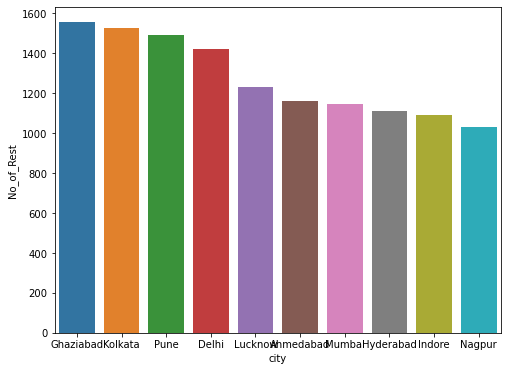

In [77]:
plt.figure(figsize=(8,6))
sns.barplot('city','No_of_Rest',data=top_10_cities)
#plt.xticks(rotation=90)

In [53]:
#Cities with the highest rated restaurants
top_10_rated = swiggy_50.groupby('city')['Rating'].agg('mean').sort_values(ascending=False).head(10)
top_10_rated = top_10_rated.reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Pune'),
  Text(5, 0, 'Thane'),
  Text(6, 0, 'Surat'),
  Text(7, 0, 'Rajkot'),
  Text(8, 0, 'Ahmedabad'),
  Text(9, 0, 'Ludhiana')])

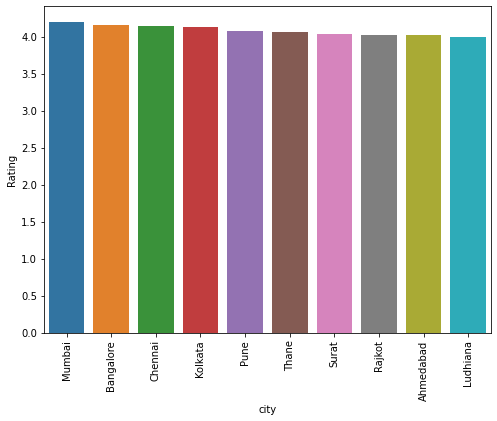

In [54]:
plt.figure(figsize=(8,6))
sns.barplot('city','Rating',data=top_10_rated)
plt.xticks(rotation=90)
#Mumbai has the highesr rated restautants, followed by banglore and chennai

In [55]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [56]:
dat1 = go.Bar(x=top_10_rated.city,y=top_10_rated.Rating)
lay1 = go.Layout(title='Cities with the highest rated restaurants',width=700,height=500)

In [57]:
fig1 = go.Figure(dat1,lay1)
py.iplot(fig1,filename='abc')
#Large metropolitans comprise most cities with the best rated restaurants 

In [58]:
#Cities with the lowest rated restaurants
worst_10_rated = swiggy_50.groupby('city')['Rating'].agg('mean').sort_values(ascending=True).head(10)
worst_10_rated = worst_10_rated.reset_index()

In [81]:
dat2 = go.Bar(x=worst_10_rated.city,y=worst_10_rated.Rating)
lay2 = go.Layout(title='Cities with the lowest rated restaurants',width=700,height=500)
fig2 = go.Figure(dat2,lay2)
py.iplot(fig2,filename='abc1')

#Seems that Mirzapur is infamous for more than one reason..!!
#Most of the cities are tier-2 or tier-3 and largely concentrated in North india

In [60]:
#Best rated restaurants in the country

swiggy_50.groupby(['Restaurant Name','city'])['Rating'].agg('mean').sort_values(ascending=False).head(10)

#Lot of lesser known restaurants in the list

Restaurant Name                         city     
POP FOOD                                Ludhiana     5.0
Griddle Mama - Grills, Rolls and Bowls  Mumbai       5.0
The Waffle House                        Jaipur       5.0
Cremeborne                              Hyderabad    5.0
White Cub                               Faridabad    5.0
Baking Bad                              Bangalore    5.0
Anand Sweets and Savouries              Hyderabad    5.0
Marvel's Kitchen                        Indore       5.0
Provenance Deli and Desserts            Bangalore    5.0
Puffin Food                             Kota         5.0
Name: Rating, dtype: float64

In [61]:
#Lowest rated restaurants in the country

swiggy_50.groupby(['Restaurant Name','city'])['Rating'].agg('mean').sort_values(ascending=True).head(10)

#Similar pattern as seen above, lowest rated restaurants mostly in tier-2 and tier 3 towns 

Restaurant Name                   city     
Cake juction                      Kalyan       1.1
                                  Bhiwandi     1.1
Champaran Mutton Hundy & Biryani  Varanasi     1.2
Eat no                            Allahabad    1.3
Hungry Dragon                     Agra         1.3
Hyderabadi Dum Biryani House      Varanasi     1.3
ROLLS MOON                        Nagpur       1.5
The Chopstixx                     Thane        1.5
Kurry Kingdom                     Cawnpore     1.5
Get Noods                         Raipur       1.5
Name: Rating, dtype: float64

In [62]:
#Lets see the distribution of veg and non veg restaurants
swiggy_50['Veg'] = swiggy_50['Veg'].astype('str')

In [63]:
veg_nveg = swiggy_50.groupby('Veg')['city'].count()
veg_nveg = veg_nveg.reset_index()
veg_nveg = veg_nveg.rename(columns={'city':'no_of_rest'})

In [64]:
veg_nveg.head(2)

,Veg,no_of_rest
0,False,23054
1,True,8750


In [65]:
dat3 = go.Pie(values=veg_nveg.no_of_rest,labels=veg_nveg.Veg)
lay3 = go.Layout(title='Break-up of veg & non veg restaurants',width=700,height=500)
fig3= go.Figure(dat3,lay3)
py.iplot(fig3,filename='abc2')

#Pre dominantly veg restaurants (72.5% of total)

In [66]:
#Lets see the average ratings for veg & non veg restaurants

swiggy_50.groupby('Veg')['Rating'].agg('mean')

#Little difference in avg ratings for veg & non veg restaurants

Veg
False    3.885073
True     3.960494
Name: Rating, dtype: float64

In [67]:
#Lets check out the best rated veg & non veg restaurants(cities) in the country

veg = swiggy_50[swiggy_50['Veg'] == "True"]
nveg = swiggy_50[swiggy_50['Veg'] == "False"]

In [68]:
top_10_veg = veg.groupby('city')['Rating'].agg('mean').sort_values(ascending=False).head(10)
top_10_veg = top_10_veg.reset_index()

In [69]:
dat4 = go.Bar(x=top_10_veg.city,y=top_10_veg.Rating)
lay4 = go.Layout(title='Cities with highest rated veg restaurants',width=700,height=500)
fig4 = go.Figure(dat4,lay4)
py.iplot(fig4,filename='abc4')

In [70]:
top_10_nveg = nveg.groupby('city')['Rating'].agg('mean').sort_values(ascending=False).head(10)
top_10_nveg = top_10_nveg.reset_index()

dat4 = go.Bar(x=top_10_nveg.city,y=top_10_nveg.Rating)
lay4 = go.Layout(title='Cities with highest rated nonveg restaurants',width=700,height=500)
fig4 = go.Figure(dat4,lay4)
py.iplot(fig4,filename='abc4')

#Mumbai has the best rated non veg restaurants, in a top 10 list capped by Ludhiana (bravo butter chicken!)
#Suprisingly, Hyderabad doesnt make the list

In [71]:
veg_ratings = veg.groupby(['city'])['Rating'].agg('mean')
veg_ratings = veg_ratings.reset_index()
nveg_ratings = nveg.groupby(['city'])['Rating'].agg('mean')
nveg_ratings = nveg_ratings.reset_index()

In [72]:
veg_nveg = pd.merge(veg_ratings,nveg_ratings,on='city')
veg_nveg = veg_nveg.rename(columns = {'Rating_x':'veg_rat','Rating_y':'nveg_rat'})

In [73]:
veg_nveg.head(5)

,city,veg_rat,nveg_rat
0,Agra,3.774242,3.728000
1,Ahmedabad,4.031489,3.999559
2,Aligarh,3.920000,3.751456
3,Allahabad,3.798333,3.669388
4,Amritsar,3.912500,3.861468


In [74]:
#Lets see the difference in ratings for Veg & Non veg restaurants

veg_nveg['veg-nveg'] = veg_nveg['veg_rat'] - veg_nveg['nveg_rat']

In [75]:
veg_nveg.groupby('city')['veg-nveg'].agg('mean').sort_values(ascending=False).head(10)
#Vizag has the largest difference between Veg & NVeg restaurants

city
Vishakhapatnam    0.288426
Bezwada           0.287408
Aurangabad        0.236064
Jaipur            0.199925
Mirzapur          0.197619
Chennai           0.195226
Kota              0.194780
Chandigarh        0.178952
Jamshedpur        0.172152
Aligarh           0.168544
Name: veg-nveg, dtype: float64

In [76]:
veg_nveg.groupby('city')['veg-nveg'].agg('mean').sort_values(ascending=True).head(10)
#Bhiwandi town has better NVeg restaurants, 
#followed by Gwalior and Ghaziabad. Notice again the prevalence of tier2 and tier 3 towns in the list

city
Bhiwandi    -0.309091
Gwalior     -0.104915
Ghaziabad   -0.058818
Meerut      -0.037730
Surat       -0.012602
Bhilai      -0.007143
Delhi       -0.005431
Dhanbad      0.005529
Bhopal       0.017281
Ahmedabad    0.031930
Name: veg-nveg, dtype: float64